# Increasing Home Sale Prices with Home Improvement Projects

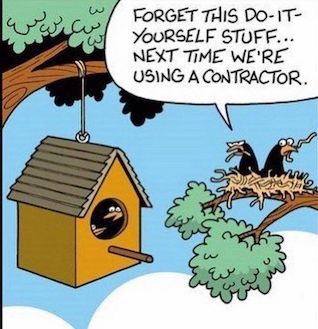

## Overview and Business Problem

#### This project analyzes the sale price of homes in King County, WA in order to make recommendations to homeowners on improvements they can make to their homes to fetch a higher sell price. 
This analysis uses data from multiple datasets and contains relevant data. Only one column contains Nan values. It also uses additional columns that were calculated using these datasets. The data analysis attempts to show the relationships between Sale Price and several features, including number of bathrooms, bedrooms, total living area, and view utilization.

## Data Understanding

This analysis focuses on home sales in King County, WA. Mobile homes and all condos were excluded to focus on one type of home. Each dataset is essential to answering the question this data analysis investigates. Such categories include information on location, location, number of fireplaces, number of bathrooms, and many more. 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
df=pd.read_csv('../../data/processed/merged_data.csv')

## Data Preperation

The plots of several selected variables showed the was heavily skewed. To address that, extreme outliers were excluded and a log transformation of the target variable was performed in order to normalize the data for further use in this analysis. Additionally, filtering homes with at least 1 bathroom, a Sale Price greater than zero, may be helpful in this analysis. Further, To assist with merging, a combination of 'Major' and 'Minor' columns was used to create a 'PIN' column. Also, the only column with 'Nan' values of View Utilization, since not all homes have a view. Lastly, regular data cleaning such as removing spaces and fixing punctuation were performed.

In [3]:
# Example of reducing extreme outliers that may skew data.

non_normal = ['SalePrice','SqFtTotLiving', 'TotBathrooms','Bedrooms','SqFtOpenPorch', 'TotFireplace']

Q1 = df[non_normal].quantile(0.25)
Q3 = df[non_normal].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[non_normal] < (Q1 - 1.5 * IQR)) |
          (df[non_normal] > (Q3 + 1.5 * IQR))).any(axis=1)]
len(df) #51160

51160

In [4]:
df.describe()

,SalePrice,Township,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,BldgGrade,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,Bedrooms,YrBuilt,YrRenovated,PcntComplete,Condition,AddnlCost,View_N,View_Y,TotBathrooms,TotFireplace
count,5.116000e+04,51160.000000,5.116000e+04,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000,51160.000000
mean,7.043198e+05,23.549375,1.551005e+04,0.024316,0.046013,0.059480,0.197361,0.014191,0.040618,0.035477,0.011396,0.015129,0.014875,0.670758,8.201407,0.344351,0.444996,2605.580649,323.496618,216.572420,1.974101,75.606196,460.672654,126.575743,5.771697,115.781431,5.134011,2.078518,3.776388,1994.890149,51.204437,0.642768,3.299472,1265.569644,0.493608,0.013468,2.591761,1.264699
std,3.405183e+05,1.737427,4.365701e+04,0.261178,0.344787,0.385988,0.689539,0.195419,0.320638,0.292220,0.164261,0.208701,0.183342,10.586917,0.964576,13.190582,18.112126,727.393714,550.608375,411.930318,3.374142,188.128360,244.965949,90.972641,42.337043,651.466189,0.708015,0.393103,0.698826,22.518123,316.249663,6.805656,0.586916,3037.133393,0.499964,0.115267,0.471553,0.591340
min,5.000000e+00,19.000000,6.430000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.750000,0.000000
25%,4.500000e+05,22.000000,5.179000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,2070.000000,0.000000,0.000000,0.000000,0.000000,400.000000,60.000000,0.000000,0.000000,5.000000,2.000000,3.000000,1983.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.500000,1.000000
50%,6.400000e+05,24.000000,7.357000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,2560.000000,0.000000,0.000000,0.000000,0.000000,460.000000,100.000000,0.000000,0.000000,5.000000,2.000000,4.000000,2002.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,8.950000e+05,25.000000,1.049400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3100.000000,700.000000,250.000000,6.000000,0.000000,600.000000,180.000000,0.000000,160.000000,5.000000,2.000000,4.000000,2014.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,2.750000,2.000000
max,1.827500e+06,26.000000,3.046586e+06,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1003.000000,13.000000,940.000000,1320.000000,5180.000000,4120.000000,3330.000000,12.000000,1940.000000,4460.000000,420.000000,2200.000000,140000.000000,8.000000,7.000000,5.000000,2020.000000,2020.000000,100.000000,5.000000,100000.000000,1.000000,1.000000,3.750000,3.000000


## Data Modeling

This analysis uses descriptive analysis, including descriptions of trends related to Sale Price. This provides a useful overview of homes with a higher sale price which can be used to make recommendations to home owners hoping to sell. This data is modeled using bar graphs to show a visual representation of sale price trends and relationships with features.

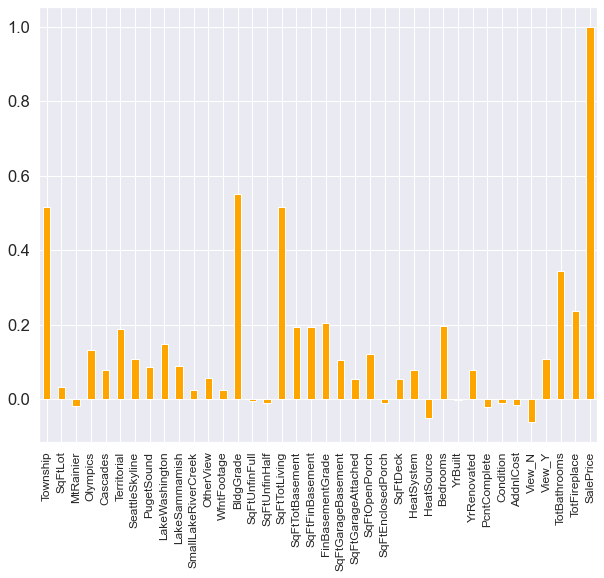

In [5]:
cols = ['Township', 'SqFtLot', 'MtRainier', 'Olympics', 'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound', 
        'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView', 'WfntFootage', 'BldgGrade', 
        'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade', 
        'SqFtGarageBasement', 'SqFtGarageAttached', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
        'HeatSource', 'ViewUtilization', 'Bedrooms', 'YrBuilt', 'YrRenovated', 'PcntComplete', 'Condition', 
        'AddnlCost', 'SaleWarning', 'View_N', 'View_Y', 'TotBathrooms', 'TotFireplace','SalePrice']
df_pres = df[cols]
df_pres

corrMatrix = df_pres.corr()
fig0, ax0 = plt.subplots(figsize=(10,8))

ax0 = corrMatrix['SalePrice'].plot(kind="bar", color='orange')
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=12, rotation=90)

plt.savefig('related.png')  

plt.show();

The target price will have a perfect correlation with itself. It is clear that there are some positively correlated features and negative correlated features.

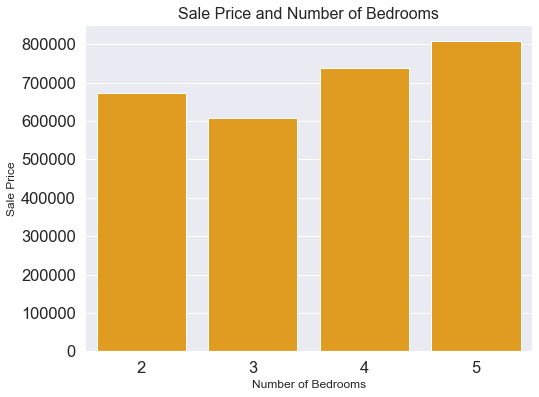

In [6]:
# Bedrooms
fig1, ax1  = plt.subplots(figsize=( 8 , 6 )) 

ax1 = sns.barplot(x="Bedrooms", y="SalePrice", data=df, color = "orange", ci=None)

ax1.set_xlabel( "Number of Bedrooms" , size = 12 ) 
ax1.set_ylabel( "Sale Price" , size = 12 ) 
ax1.set_title( "Sale Price and Number of Bedrooms" , size = 16 ) 

plt.savefig('BdrmSP.png')  
plt.show();

On average, the typical home sold had 3.75 bedrooms. In the bar graph we see that homes with 3 bedrooms sold for less than 2,4,5 bedrooms homes. 

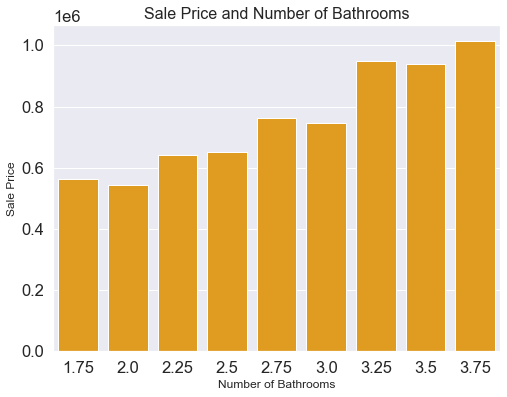

In [7]:
fig2, ax2  = plt.subplots(figsize=( 8 , 6 )) 

ax2 = sns.barplot(x="TotBathrooms", y="SalePrice", data=df, color = "orange", ci=None)

ax2.set_xlabel( "Number of Bathrooms" , size = 12 ) 
ax2.set_ylabel( "Sale Price" , size = 12 ) 
ax2.set_title( "Sale Price and Number of Bathrooms" , size = 16 ) 
plt.savefig('BthRmSP.png')  

plt.show();

On average, the typical home sold had 2.5 bathrooms. In the bar graph we see that homes with 1 3/4 and 2 bathrooms sold for less for homes with 2 and a quarter bathrooms. The bar graph also shows how the sale price increases with the number of bathrooms. 

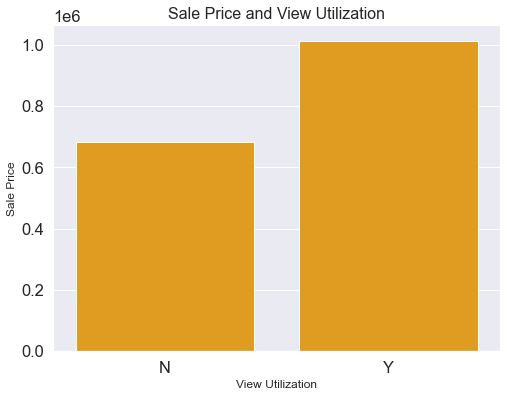

In [8]:
fig3, ax3  = plt.subplots(figsize=( 8 , 6 )) 

ax3 = sns.barplot(x="ViewUtilization", y="SalePrice", data=df, color = "orange", ci=None)

ax3.set_xlabel( "View Utilization" , size = 12 ) 
ax3.set_ylabel( "Sale Price" , size = 12 ) 
ax3.set_title( "Sale Price and View Utilization" , size = 16 ) 

plt.savefig('UsedViewOrNo.png')  
plt.show();

The bar graph shows homes that utilized view and homes that did not (even though they could). Many homes sold with a view sold for a higher price than homes that had a view but did not utilize it.

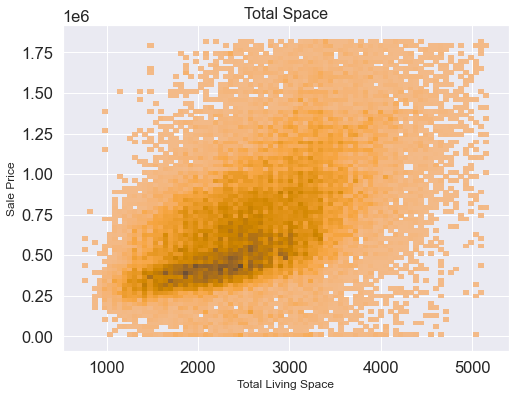

In [9]:
fig4, ax4  = plt.subplots(figsize=( 8 , 6 )) 

ax4 = sns.histplot(x="SqFtTotLiving", y="SalePrice", data=df, color = "orange")

ax4.set_xlabel( "Total Living Space" , size = 12 ) 
ax4.set_ylabel( "Sale Price" , size = 12 ) 
ax4.set_title( "Total Space" , size = 16 ) 
plt.savefig('TotLivSpace.png')  
plt.show();

There is a lot of variability in the Sale Price and Total Living Space. One feature displayed by the darker region of this plot is some linearity with Sales Price.

## Evaluation

This data analysis only included homes with a fixed location with at least 1 bedroom and 1 bathroom in King County, WA. I am confident that this model will be helpful to homeowners looking to increase the sale price of their homes.


## Conclusions

The data analysis supports the following recommendations for home owners hoping to increase the sale price of their home.

#### 1. Have a least 2 , 4-5 bedrooms ####

The model used in this analysis showed the coefficient for bedrooms to be -99.2213. For each increase of bedrooms by 1 unit, it is predicted to have a -99.22 on the Sale Price. Using a bar graph to map this data it was revealed that homes with three bedrooms sold for less than homes with 2 or 4-5 bedrooms.

#### 2. Increase total bathrooms to 2.25-3.75 ####

The model used in this analysis showed the coefficient for the  bathrooms to be 11.7288. This means, for each increase by 1 unit of bathrooms, it is predicted to have a change on 11.79 on the Sale Price.

#### 3. Utilize surrounding view, if available. #### 
127.0248
The highest positive coefficient predicted by the model was the utilizing the available view. The coefficient for Utilizing view feature was 127.02. Because the data here was categorical and binary, one unit (or actually utilizing the view) was predicted to have a positive change of 127.02 on Sale Price.

#### 4. Consider projects that will expand the total living space. #### 
The model used in this analysis showed the coefficient for the  total living space to be 15.1737. This means, for each increase by 1 unit of total living, it is predicted to have a change on 15.17 on the Sale Price.


Furtur analysis could yield different insights:

#### 1. Investigate ways to improve model. ####

With more time it would have been interesting to compare the performance of Forward Selection with statsmodels with the regression models built by hand.

#### 2. Investigate why the number of bedrooms had such a large, negative coefficient. ####
Was this limited to certain districts/towns/years?
What are the sizes of each typical bedroom?